# Data Analysis and Visulisation ZFOURGE SED Decomposition Data from CIGALE 
This script is to be used for the data analysis of my project. This will contain some of the data analysis and visulisations for the decomposed sed data that will be used in my thesis. This will be one part of a bigger section on data analysis and will be covered later in other notebooks.

It is intended for the data analysis in this notebook to be exclusively used for my thesis work.

In [45]:
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
import os
from astLib import astSED
import astropy.io.fits as fits
from carf import * # custom module for functions relating to the project
import matplotlib.path as mpath
import seaborn as sns
from scipy.stats import gaussian_kde
import scipy as sp

# So that we can change the helper functions without reloading the kernel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
figsize_params = (7, 5)

save_figures = True

In [47]:
# We need to ensure we are reading in our final dataframe we will be doing our analysis on. This dataframe should contain
zfourge_full = pd.read_csv('datasets/full_zfourge_decomposed/zfourge_full.csv')

c:\Users\Mitchell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (156) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [48]:
# Check the zpk_x
zfourge_full['zpk_x'].value_counts()

0.4171    10
0.6654     8
0.6127     8
0.8630     8
0.9268     7
          ..
2.0720     1
0.4775     1
1.5624     1
0.1065     1
0.2697     1
Name: zpk_x, Length: 5214, dtype: int64

In [49]:

# Identify the columns we are interested in
for col in zfourge_full.columns:
    print(col)
# UV_Full
# VJ_Full
# UV_Decomposed
# VJ_Decomposed
# ID
# RAJ2000
# DEJ2000
# zspec
# zpk_x ? or zpk_y
# lssfr
# lmass
# mag_U
# mag_V
# mag_J
# e_mag_U
# e_mag_V
# e_mag_J
# field
# UV, VJ? id what these are probs just fully clalulated UV and VJ colours from above

# Create a subset of the dataset we are interested
zfourge_subset = zfourge_full[['ID', 'UV_Full', 'VJ_Full', 'UV_Decomposed', 'VJ_Decomposed', 'UG_Full', 'GR_Full', 'UG_Decomposed', 'GR_Decomposed', 'lssfr', 'lmass', 'mag_U', 'mag_V', 'mag_J', 'field', 'zpk_x']]

# Pairplot of a subset of the dataset 
# Create a pairplot of the dataset
sns.pairplot(zfourge_subset[['UV_Full', 'VJ_Full', 'UV_Decomposed', 'VJ_Decomposed', 'UG_Full', 'GR_Full', 'UG_Decomposed', 'GR_Decomposed', 'lssfr', 'lmass', 'zpk_x']], diag_kind='kde')



recno
ID
xpos
ypos
RAJ2000
DEJ2000
SE
isoArea
FKsap
e_FKsap
apcorr
KsR
FKsapD
e_FKsapD
apcorrD
FKsD
e_FKsD
FKsauto
R50
amaj
bmin
Rad
FKsall
e_FKsall
w_FKsall
FB
e_FB
w_FB
FI
e_FI
w_FI
FR
e_FR
w_FR
FU
e_FU
w_FU
FV
e_FV
w_FV
FZ
e_FZ
w_FZ
FHs
e_FHs
w_FHs
FHl
e_FHl
w_FHl
FJ1
e_FJ1
w_FJ1
FJ2
e_FJ2
w_FJ2
FJ3
e_FJ3
w_FJ3
FKs
e_FKs
w_FKs
FKsHI
e_FKsHI
w_FKsHI
NB118
e_NB118
w_NB118
NB209
e_NB209
w_NB209
F098M
e_F098M
w_F098M
F105W
e_F105W
w_F105W
F125W
e_F125W
w_F125W
F140W
e_F140W
w_F140W
F160W
e_F160W
w_F160W
F814W
e_F814W
w_F814W
IA484
e_IA484
w_IA484
IA527
e_IA527
w_IA527
IA574
e_IA574
w_IA574
IA598
e_IA598
w_IA598
IA624
e_IA624
w_IA624
IA651
e_IA651
w_IA651
IA679
e_IA679
w_IA679
IA738
e_IA738
w_IA738
IA767
e_IA767
w_IA767
IA797
e_IA797
w_IA797
IA856
e_IA856
w_IA856
FVWFI
e_FVWFI
w_FVWFI
FRcWFI
e_FRcWFI
w_FRcWFI
FU38
e_FU38
w_FU38
FKT
e_FKT
w_FKT
F3.6
e_F3.6
w_F3.6
F4.5
e_F4.5
w_F4.5
F5.8
e_F5.8
w_F5.8
F8.0
e_F8.0
w_F8.0
wminOpt
wmin1
wminFS
wminNIR
wmin2
wminIR
wmin
Star
Nghb
Use
SNR
Use2


In [50]:
# Now that we have this we can explore
# Plot a histogram of the redshifts
plt.figure(figsize=(8, 3))
plt.hist(zfourge_subset['zpk_x'], bins=50)
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.title('Histogram of Redshifts')
plt.show()

# Max redshift
max_redshift = zfourge_subset['zpk_x'].max()

print('Max redshift:', max_redshift)

Exploring the UVJ Diagram using the Decomposed Colours obtained using CIGALE using data from the ZFOURGE Survey.

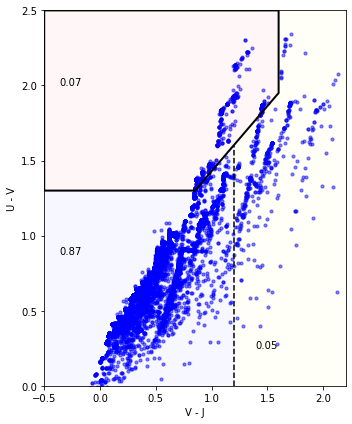

In [35]:
# Maybe just plot an all redshift UVJ diagram 
fig, axs = plt.subplots(1, 1, figsize=(5, 6), sharex=True, sharey=True)

# Reset the galaxy fractions
galaxy_fractions = {'Star-forming': [], 'Quiescent': [], 'Dusty': []} # each key will have a list of fractions for each alpha value
num_galaxies = len(zfourge_subset) # number of galaxies in the composite_flux in the rest frame

vj = zfourge_subset['VJ_Full']
uv = zfourge_subset['UV_Full']

# Plot the UVJ diagram
axs.scatter(vj, uv, c='blue', s=10, alpha=0.5, marker='o')

# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# We will obtain the Star-forming, Quiescent, and Dusty Fractions for this particular alpha value     
# Obtain the number of galaxies with sf region dictated by the sf path
# Create Path objects from your path coordinates (do this once, outside the loop)
path_quiescent_obj = mpath.Path(path_quiescent)
path_sf_obj = mpath.Path(path_sf)
path_sfd_obj = mpath.Path(path_sfd)

# Create a DataFrame with just the uv and vj columns for easier selection
uvj_data = pd.DataFrame({'vj': vj, 'uv': uv})

# Perform the selection
quiescent_seds = uvj_data[path_quiescent_obj.contains_points(uvj_data.values)]
sf_seds = uvj_data[path_sf_obj.contains_points(uvj_data.values)]
sfd_seds = uvj_data[path_sfd_obj.contains_points(uvj_data.values)]

# Calculate the fractions
galaxy_fractions['Quiescent'].append(len(quiescent_seds) / num_galaxies)
galaxy_fractions['Star-forming'].append(len(sf_seds) / num_galaxies)
galaxy_fractions['Dusty'].append(len(sfd_seds) / num_galaxies)

quiescent_fraction = galaxy_fractions['Quiescent'][0]
sf_fraction = galaxy_fractions['Star-forming'][0]
sfd_fraction = galaxy_fractions['Dusty'][0]


    # Add patches for selections
axs.add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
axs.add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
axs.add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
axs.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)

# Add axis labels
axs.set_xlabel("V - J")
axs.set_ylabel("U - V")

# Plot the fractions in the corner of each section on the UVJ
axs.text(0.05, 0.8, f'{quiescent_fraction:.2f}', transform=axs.transAxes, color='k')
axs.text(0.05, 0.35, f'{sf_fraction:.2f}', transform=axs.transAxes, color='k')
axs.text(0.70, 0.1, f'{sfd_fraction:.2f}', transform=axs.transAxes, color='k')
# AGN Colour Evolution title - just call it redshift
# axs.set_title(f"Colour Evolution for ZFOURGE Composites")

# Ensure limits
axs.set_xlim(-0.5, 2.2)
axs.set_ylim(0, 2.5)
    # Make the subplots closer together
# plt.subplots_adjust(wspace=0.05, hspace=0.3)


plt.tight_layout()




# Save 
if save_figures:
    plt.savefig(f'outputs/ThesisPlots/UVJ_agn_evolution_CIGALE_ZFOURGE.png')

plt.show()

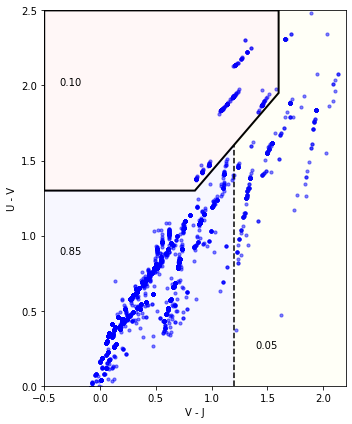

In [36]:
# Maybe just plot an all redshift UVJ diagram 
fig, axs = plt.subplots(1, 1, figsize=(5, 6), sharex=True, sharey=True)

# Reset the galaxy fractions
galaxy_fractions = {'Star-forming': [], 'Quiescent': [], 'Dusty': []} # each key will have a list of fractions for each alpha value
num_galaxies = len(zfourge_subset) # number of galaxies in the composite_flux in the rest frame

vj = zfourge_subset['VJ_Decomposed']
uv = zfourge_subset['UV_Decomposed']

# Plot the UVJ diagram
axs.scatter(vj, uv, c='blue', s=10, alpha=0.5, marker='o')

# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# We will obtain the Star-forming, Quiescent, and Dusty Fractions for this particular alpha value     
# Obtain the number of galaxies with sf region dictated by the sf path
# Create Path objects from your path coordinates (do this once, outside the loop)
path_quiescent_obj = mpath.Path(path_quiescent)
path_sf_obj = mpath.Path(path_sf)
path_sfd_obj = mpath.Path(path_sfd)

# Create a DataFrame with just the uv and vj columns for easier selection
uvj_data = pd.DataFrame({'vj': vj, 'uv': uv})

# Perform the selection
quiescent_seds = uvj_data[path_quiescent_obj.contains_points(uvj_data.values)]
sf_seds = uvj_data[path_sf_obj.contains_points(uvj_data.values)]
sfd_seds = uvj_data[path_sfd_obj.contains_points(uvj_data.values)]

# Calculate the fractions
galaxy_fractions['Quiescent'].append(len(quiescent_seds) / num_galaxies)
galaxy_fractions['Star-forming'].append(len(sf_seds) / num_galaxies)
galaxy_fractions['Dusty'].append(len(sfd_seds) / num_galaxies)

quiescent_fraction = galaxy_fractions['Quiescent'][0]
sf_fraction = galaxy_fractions['Star-forming'][0]
sfd_fraction = galaxy_fractions['Dusty'][0]


    # Add patches for selections
axs.add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
axs.add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
axs.add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
axs.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)

# Add axis labels
axs.set_xlabel("V - J")
axs.set_ylabel("U - V")

# Plot the fractions in the corner of each section on the UVJ
axs.text(0.05, 0.8, f'{quiescent_fraction:.2f}', transform=axs.transAxes, color='k')
axs.text(0.05, 0.35, f'{sf_fraction:.2f}', transform=axs.transAxes, color='k')
axs.text(0.70, 0.1, f'{sfd_fraction:.2f}', transform=axs.transAxes, color='k')
# AGN Colour Evolution title - just call it redshift
# axs.set_title(f"Colour Evolution for ZFOURGE Composites")

# Ensure limits
axs.set_xlim(-0.5, 2.2)
axs.set_ylim(0, 2.5)
    # Make the subplots closer together
# plt.subplots_adjust(wspace=0.05, hspace=0.3)


plt.tight_layout()




# Save 
if save_figures:
    plt.savefig(f'outputs/ThesisPlots/UVJ_agn_evolution_CIGALE_ZFOURGE.png')

plt.show()

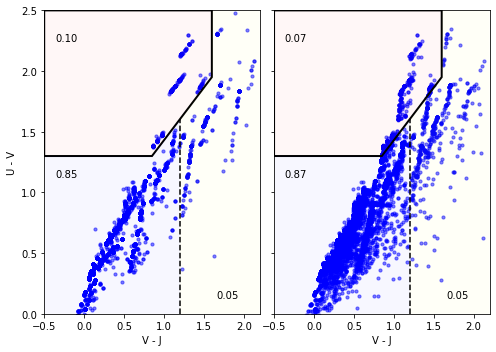

In [37]:
# Plot a UVJ diagram showing both the full and decomposed UVJ colours
fig, ax = plt.subplots(1, 2, figsize=(7, 5), sharex=True, sharey=True)

galaxy_mode = ['Decomposed', 'Full']

for i in range(2):
    # Maybe just plot an all redshift UVJ diagram 
    axs = ax[i]
    # Reset the galaxy fractions
    galaxy_fractions = {'Star-forming': [], 'Quiescent': [], 'Dusty': []} # each key will have a list of fractions for each alpha value
    num_galaxies = len(zfourge_subset) # number of galaxies in the composite_flux in the rest frame

    vj = zfourge_subset[f'VJ_{galaxy_mode[i]}']
    uv = zfourge_subset[f'UV_{galaxy_mode[i]}']

    # Plot the UVJ diagram
    axs.scatter(vj, uv, c='blue', s=10, alpha=0.5, marker='o')

    # Define paths for selections
    path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
    path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
    path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

    # We will obtain the Star-forming, Quiescent, and Dusty Fractions for this particular alpha value     
    # Obtain the number of galaxies with sf region dictated by the sf path
    # Create Path objects from your path coordinates (do this once, outside the loop)
    path_quiescent_obj = mpath.Path(path_quiescent)
    path_sf_obj = mpath.Path(path_sf)
    path_sfd_obj = mpath.Path(path_sfd)

    # Create a DataFrame with just the uv and vj columns for easier selection
    uvj_data = pd.DataFrame({'vj': vj, 'uv': uv})

    # Perform the selection
    quiescent_seds = uvj_data[path_quiescent_obj.contains_points(uvj_data.values)]
    sf_seds = uvj_data[path_sf_obj.contains_points(uvj_data.values)]
    sfd_seds = uvj_data[path_sfd_obj.contains_points(uvj_data.values)]

    # Calculate the fractions
    galaxy_fractions['Quiescent'].append(len(quiescent_seds) / num_galaxies)
    galaxy_fractions['Star-forming'].append(len(sf_seds) / num_galaxies)
    galaxy_fractions['Dusty'].append(len(sfd_seds) / num_galaxies)

    quiescent_fraction = galaxy_fractions['Quiescent'][0]
    sf_fraction = galaxy_fractions['Star-forming'][0]
    sfd_fraction = galaxy_fractions['Dusty'][0]


        # Add patches for selections
    axs.add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
    axs.add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
    axs.add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

    # Add vertical line
    axs.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)

    # Add axis labels
    axs.set_xlabel("V - J")
    

    # Plot the fractions in the corner of each section on the UVJ
    axs.text(0.05, 0.9, f'{quiescent_fraction:.2f}', transform=axs.transAxes, color='k')
    axs.text(0.05, 0.45, f'{sf_fraction:.2f}', transform=axs.transAxes, color='k')
    axs.text(0.80, 0.05, f'{sfd_fraction:.2f}', transform=axs.transAxes, color='k')
    # AGN Colour Evolution title - just call it redshift
    # axs.set_title(f"Colour Evolution for ZFOURGE Composites")

    # Ensure limits
    axs.set_xlim(-0.5, 2.2)
    axs.set_ylim(0, 2.5)
        # Make the subplots closer together
    # plt.subplots_adjust(wspace=0.05, hspace=0.3)

ax[0].set_ylabel("U - V")
plt.tight_layout()




# Save 
if save_figures:
    plt.savefig(f'outputs/ThesisPlots/UVJ_agn_evolution_CIGALE_ZFOURGE_comparison.png')

plt.show()


# This is a very cool plot showing some of the interesting behaviour of the UVJ diagram

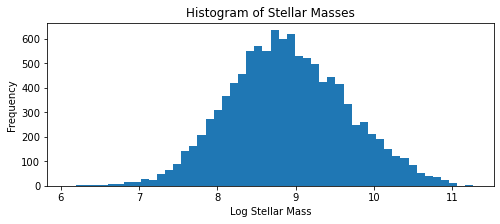

In [38]:
# Explore the results of the sed decomposition in different mass/redshift bins
# For every mas redshift bin we look at we will also plot the above UVJ diagram, and see if there is a characteristic behaviour

# Create a heap of redshift bins


#
# begin by seperating master dataframe into redshift ranges of 0.2 to 0.8, 0.8 to 1.4, 1.4 to 2.0, 2.0 to 2.6, 2.6 to 3.2
# df_0_2 = df[(df['zpk'] >= 0.2) & (df['zpk'] < 0.8)]
# df_0_8 = df[(df['zpk'] >= 0.8) & (df['zpk'] < 1.4)]
# df_1_4 = df[(df['zpk'] >= 1.4) & (df['zpk'] < 2.0)]
# df_2_0 = df[(df['zpk'] >= 2.0) & (df['zpk'] < 2.6)]
# df_2_6 = df[(df['zpk'] >= 2.6) & (df['zpk'] < 3.2)]

# Redshift bins
z_bins = [(0.2, 0.8), (0.8, 1.4), (1.4, 2.0), (2.0, 2.6), (2.6, 3.2), (3.2, 3.8), (3.8, 4.4), (4.4, 5.0)]
#lmass_bins = [(8.5, 9.5), (9.5, 10.5), (10.5, 11.5), (11.5, 12.5), (12.5, 13.5)]
# maybe a reduce mass bin (9.25 to 9.75), 9.75 to 10.25, 10.25 to 10.75, 10.75 to 11.25, 11.25 to 11.75, 11.75 to 12.25, 12.25 to 12.75, 12.75 to 13.25
lmass_bins = [(8.75, 9.25),(9.25, 9.75),(9.75, 10.25), (10.25, 10.75), (10.75, 11.25), (11.25, 11.75)] # Target redshit bins

# Drop the lass mass bin
lmass_bins = [(8.75, 9.25),(9.25, 9.75),(9.75, 10.25), (10.25, 10.75), (10.75, 11.25), (11.25, 11.75), (11.75, 12.25), (12.25, 12.75), (12.75, 13.25)] # Target


# Alternatively create new mass bins to make less plot
lmass_bins = [(8.75, 9.75), (9.75, 10.75), (10.75, 11.75)] # Target

# Plot the distribution of masses
plt.figure(figsize=(8, 3))
plt.hist(zfourge_subset['lmass'], bins=50)
plt.xlabel('Log Stellar Mass')
plt.ylabel('Frequency')
plt.title('Histogram of Stellar Masses')
plt.show()






lmass Bin: (8.75, 9.75)
lmass Bin: (9.75, 10.75)
lmass Bin: (10.75, 11.75)


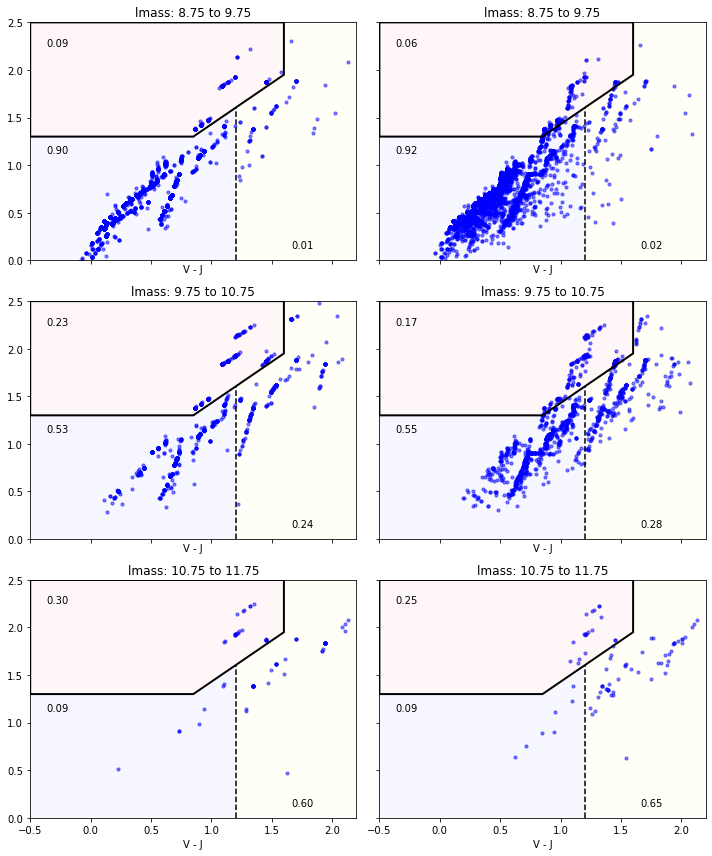

In [39]:
# How about for all redshifts plot the masses in bins

# Calculate the number of rows needed for subplots
num_rows = len(lmass_bins) 

# Create the figure and axes
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 4 * num_rows), sharex=True, sharey=True) 

galaxy_mode = ['Decomposed', 'Full']

for row_idx, lmass_bin in enumerate(lmass_bins):
    zfourge_subset_massbin = zfourge_subset[(zfourge_subset['lmass'] >= lmass_bin[0]) & (zfourge_subset['lmass'] < lmass_bin[1])]
    print("lmass Bin:", lmass_bin)

    for col_idx in range(2):
        axs = axes[row_idx, col_idx]  # Get the axis for this subplot
        # Maybe just plot an all redshift UVJ diagram 

        # Reset the galaxy fractions
        galaxy_fractions = {'Star-forming': [], 'Quiescent': [], 'Dusty': []} # each key will have a list of fractions for each alpha value
        num_galaxies = len(zfourge_subset_massbin) # number of galaxies in the composite_flux in the rest frame

        vj = zfourge_subset_massbin[f'VJ_{galaxy_mode[col_idx]}']
        uv = zfourge_subset_massbin[f'UV_{galaxy_mode[col_idx]}']

        # Plot the UVJ diagram
        axs.scatter(vj, uv, c='blue', s=10, alpha=0.5, marker='o')

        # Define paths for selections
        path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
        path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
        path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

        # We will obtain the Star-forming, Quiescent, and Dusty Fractions for this particular alpha value     
        # Obtain the number of galaxies with sf region dictated by the sf path
        # Create Path objects from your path coordinates (do this once, outside the loop)
        path_quiescent_obj = mpath.Path(path_quiescent)
        path_sf_obj = mpath.Path(path_sf)
        path_sfd_obj = mpath.Path(path_sfd)

        # Create a DataFrame with just the uv and vj columns for easier selection
        uvj_data = pd.DataFrame({'vj': vj, 'uv': uv})

        # Perform the selection
        quiescent_seds = uvj_data[path_quiescent_obj.contains_points(uvj_data.values)]
        sf_seds = uvj_data[path_sf_obj.contains_points(uvj_data.values)]
        sfd_seds = uvj_data[path_sfd_obj.contains_points(uvj_data.values)]

        # Calculate the fractions
        galaxy_fractions['Quiescent'].append(len(quiescent_seds) / num_galaxies)
        galaxy_fractions['Star-forming'].append(len(sf_seds) / num_galaxies)
        galaxy_fractions['Dusty'].append(len(sfd_seds) / num_galaxies)

        quiescent_fraction = (galaxy_fractions['Quiescent'][0])
        sf_fraction = galaxy_fractions['Star-forming'][0]
        sfd_fraction = galaxy_fractions['Dusty'][0]


            # Add patches for selections
        axs.add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
        axs.add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
        axs.add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

        # Add vertical line
        axs.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)

        # Add axis labels
        axs.set_xlabel("V - J")
        
        # # Plot the title on each subplot 
        # if galaxy_mode[col_idx] == 'Decomposed':
        #     axs.set_title(f"AGN Removed Galaxies")
        # else:
        #     axs.set_title(f"Unaltered Galaxies")
        # #For each plot, plot themass range
        axs.set_title(f"lmass: {lmass_bin[0]} to {lmass_bin[1]}")
        
        # 

        # Plot the fractions in the corner of each section on the UVJ
        axs.text(0.05, 0.9, f'{quiescent_fraction:.2f}', transform=axs.transAxes, color='k')
        axs.text(0.05, 0.45, f'{sf_fraction:.2f}', transform=axs.transAxes, color='k')
        axs.text(0.80, 0.05, f'{sfd_fraction:.2f}', transform=axs.transAxes, color='k')
        # AGN Colour Evolution title - just call it redshift
        # axs.set_title(f"Colour Evolution for ZFOURGE Composites")

        # Ensure limits
        axs.set_xlim(-0.5, 2.2)
        axs.set_ylim(0, 2.5)
            # Make the subplots closer together
        # plt.subplots_adjust(wspace=0.05, hspace=0.3)

        ax[0].set_ylabel("U - V")
plt.tight_layout()

# Save
if save_figures:
    plt.savefig(f'outputs/ThesisPlots/UVJ_agn_evolution_CIGALE_ZFOURGE_massbins.png')
    

plt.show()





z Bin: (0.2, 0.8)
z Bin: (0.8, 1.4)
z Bin: (1.4, 2.0)
z Bin: (2.0, 2.6)
z Bin: (2.6, 3.2)
z Bin: (3.2, 3.8)
z Bin: (3.8, 4.4)
z Bin: (4.4, 5.0)


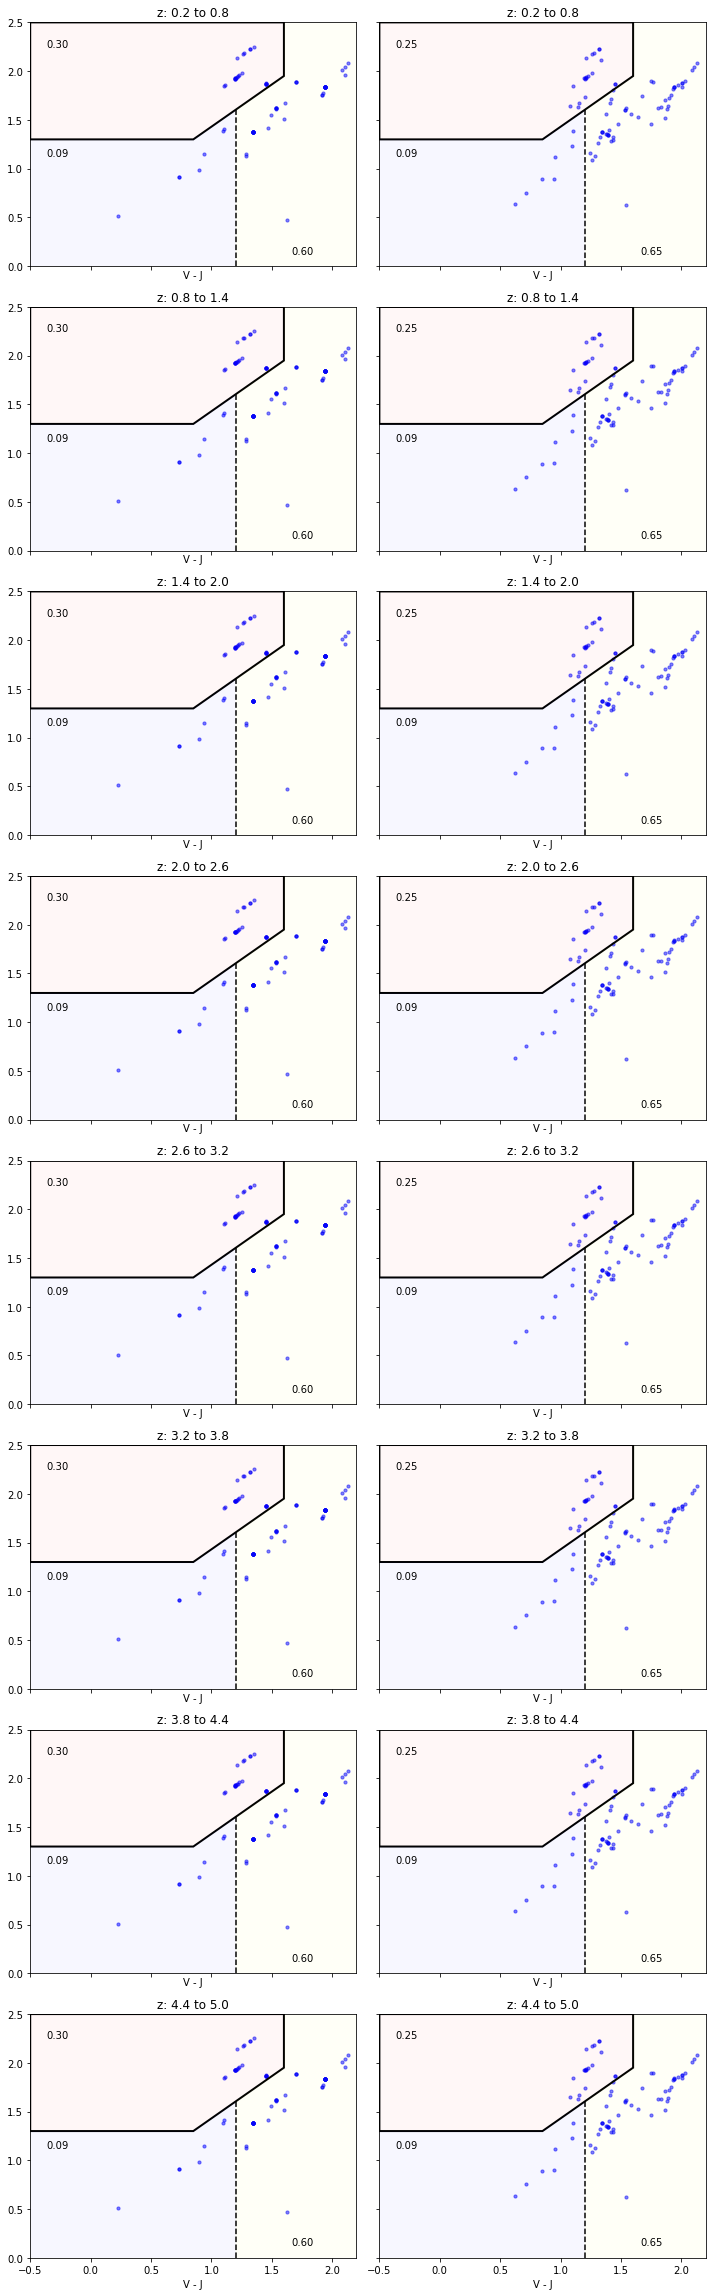

In [40]:
# For all masses plot the redshift in bins
# Do the same thing but instead do redshift bins
# How about for all redshifts plot the masses in bins

# Calculate the number of rows needed for subplots
num_rows = len(z_bins) 

# Create the figure and axes
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 4 * num_rows), sharex=True, sharey=True) 

galaxy_mode = ['Decomposed', 'Full']

for row_idx, z_bin in enumerate(z_bins):
    zfourge_subset_zbin = zfourge_subset[(zfourge_subset['zpk_x'] >= z_bin[0]) & (zfourge_subset['zpk_x'] < z_bin[1])]
    print("z Bin:", z_bin)

    for col_idx in range(2):
        axs = axes[row_idx, col_idx]  # Get the axis for this subplot
        # Maybe just plot an all redshift UVJ diagram 

        # Reset the galaxy fractions
        galaxy_fractions = {'Star-forming': [], 'Quiescent': [], 'Dusty': []} # each key will have a list of fractions for each alpha value
        num_galaxies = len(zfourge_subset_massbin) # number of galaxies in the composite_flux in the rest frame

        vj = zfourge_subset_massbin[f'VJ_{galaxy_mode[col_idx]}']
        uv = zfourge_subset_massbin[f'UV_{galaxy_mode[col_idx]}']

        # Plot the UVJ diagram
        axs.scatter(vj, uv, c='blue', s=10, alpha=0.5, marker='o')

        # Define paths for selections
        path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
        path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
        path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

        # We will obtain the Star-forming, Quiescent, and Dusty Fractions for this particular alpha value     
        # Obtain the number of galaxies with sf region dictated by the sf path
        # Create Path objects from your path coordinates (do this once, outside the loop)
        path_quiescent_obj = mpath.Path(path_quiescent)
        path_sf_obj = mpath.Path(path_sf)
        path_sfd_obj = mpath.Path(path_sfd)

        # Create a DataFrame with just the uv and vj columns for easier selection
        uvj_data = pd.DataFrame({'vj': vj, 'uv': uv})

        # Perform the selection
        quiescent_seds = uvj_data[path_quiescent_obj.contains_points(uvj_data.values)]
        sf_seds = uvj_data[path_sf_obj.contains_points(uvj_data.values)]
        sfd_seds = uvj_data[path_sfd_obj.contains_points(uvj_data.values)]

        # Calculate the fractions
        galaxy_fractions['Quiescent'].append(len(quiescent_seds) / num_galaxies)
        galaxy_fractions['Star-forming'].append(len(sf_seds) / num_galaxies)
        galaxy_fractions['Dusty'].append(len(sfd_seds) / num_galaxies)

        quiescent_fraction = (galaxy_fractions['Quiescent'][0])
        sf_fraction = galaxy_fractions['Star-forming'][0]
        sfd_fraction = galaxy_fractions['Dusty'][0]


            # Add patches for selections
        axs.add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
        axs.add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
        axs.add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

        # Add vertical line
        axs.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)

        # Add axis labels
        axs.set_xlabel("V - J")
        
        # # Plot the title on each subplot 
        # if galaxy_mode[col_idx] == 'Decomposed':
        #     axs.set_title(f"AGN Removed Galaxies")
        # else:
        #     axs.set_title(f"Unaltered Galaxies")
        # #For each plot, plot themass range
        axs.set_title(f"z: {z_bin[0]} to {z_bin[1]}")
        
        # 

        # Plot the fractions in the corner of each section on the UVJ
        axs.text(0.05, 0.9, f'{quiescent_fraction:.2f}', transform=axs.transAxes, color='k')
        axs.text(0.05, 0.45, f'{sf_fraction:.2f}', transform=axs.transAxes, color='k')
        axs.text(0.80, 0.05, f'{sfd_fraction:.2f}', transform=axs.transAxes, color='k')
        # AGN Colour Evolution title - just call it redshift
        # axs.set_title(f"Colour Evolution for ZFOURGE Composites")

        # Ensure limits
        axs.set_xlim(-0.5, 2.2)
        axs.set_ylim(0, 2.5)
            # Make the subplots closer together
        # plt.subplots_adjust(wspace=0.05, hspace=0.3)

        ax[0].set_ylabel("U - V")
plt.tight_layout()

# Save
if save_figures:
    plt.savefig(f'outputs/ThesisPlots/UVJ_agn_evolution_CIGALE_ZFOURGE_zbins.png')
    

plt.show()


z Bin: (0.2, 0.8)


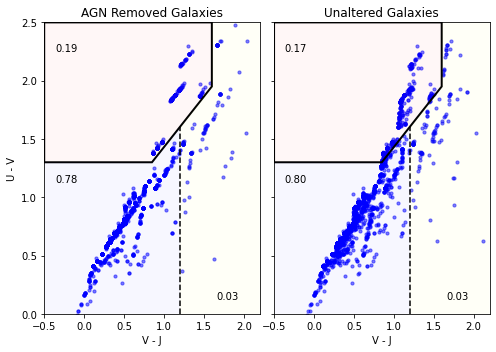

z Bin: (0.8, 1.4)


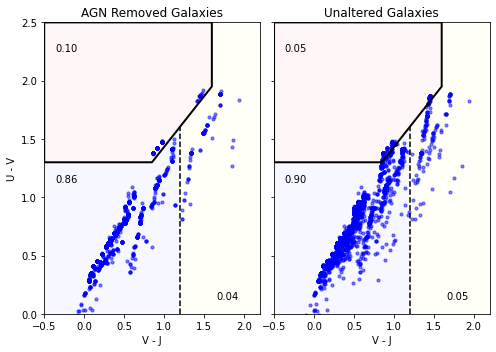

z Bin: (1.4, 2.0)


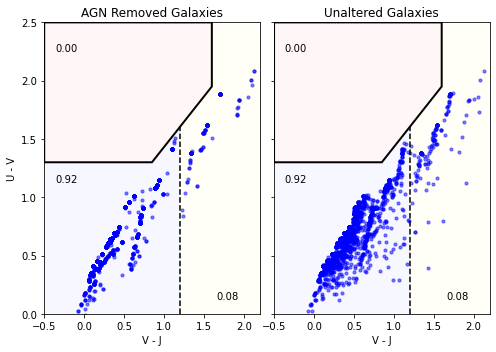

z Bin: (2.0, 2.6)


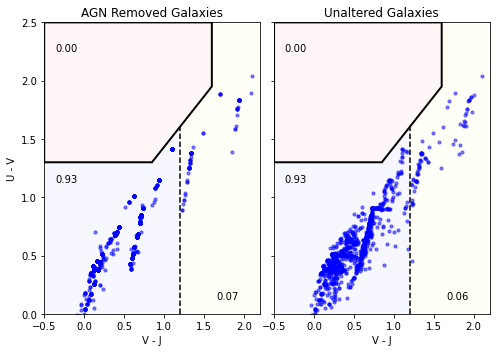

z Bin: (2.6, 3.2)


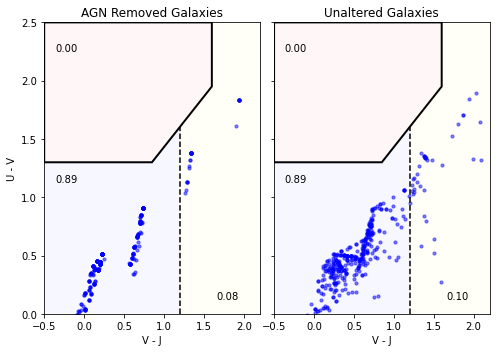

z Bin: (3.2, 3.8)


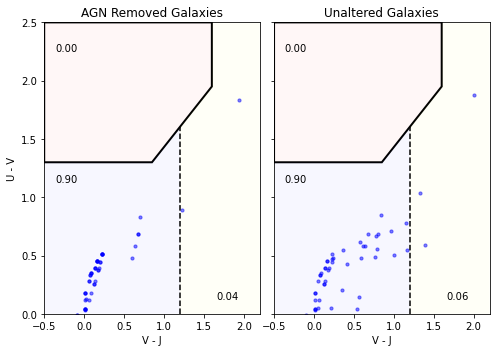

z Bin: (3.8, 4.4)


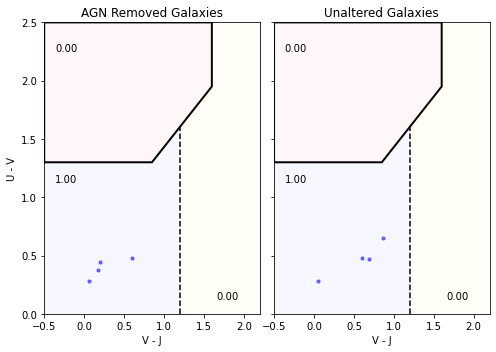

z Bin: (4.4, 5.0)


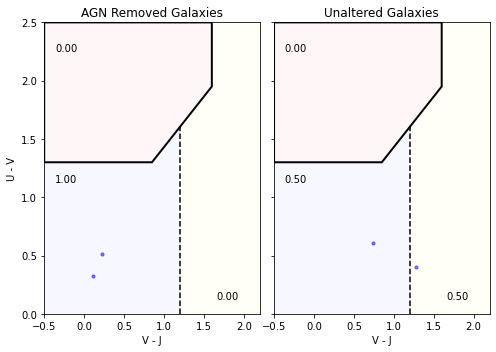

In [41]:

for z_bin in z_bins:
    # Plot a UVJ diagram showing both the full and decomposed UVJ colours
    fig, ax = plt.subplots(1, 2, figsize=(7, 5), sharex=True, sharey=True)

    galaxy_mode = ['Decomposed', 'Full']

    zfourge_subset_zbin = zfourge_subset[(zfourge_subset['zpk_x'] >= z_bin[0]) & (zfourge_subset['zpk_x'] < z_bin[1])]
    print("z Bin:", z_bin)
    for i in range(2):
        # Maybe just plot an all redshift UVJ diagram 
        axs = ax[i]
        # Reset the galaxy fractions
        galaxy_fractions = {'Star-forming': [], 'Quiescent': [], 'Dusty': []} # each key will have a list of fractions for each alpha value
        num_galaxies = len(zfourge_subset_zbin) # number of galaxies in the composite_flux in the rest frame

        vj = zfourge_subset_zbin[f'VJ_{galaxy_mode[i]}']
        uv = zfourge_subset_zbin[f'UV_{galaxy_mode[i]}']

        # Plot the UVJ diagram
        axs.scatter(vj, uv, c='blue', s=10, alpha=0.5, marker='o')

        # Define paths for selections
        path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
        path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
        path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

        # We will obtain the Star-forming, Quiescent, and Dusty Fractions for this particular alpha value     
        # Obtain the number of galaxies with sf region dictated by the sf path
        # Create Path objects from your path coordinates (do this once, outside the loop)
        path_quiescent_obj = mpath.Path(path_quiescent)
        path_sf_obj = mpath.Path(path_sf)
        path_sfd_obj = mpath.Path(path_sfd)

        # Create a DataFrame with just the uv and vj columns for easier selection
        uvj_data = pd.DataFrame({'vj': vj, 'uv': uv})
        
        # Perform the selection
        quiescent_seds = uvj_data[path_quiescent_obj.contains_points(uvj_data.values)]
        sf_seds = uvj_data[path_sf_obj.contains_points(uvj_data.values)]
        sfd_seds = uvj_data[path_sfd_obj.contains_points(uvj_data.values)]
        
        # Calculate the fractions
        galaxy_fractions['Quiescent'].append(len(quiescent_seds) / num_galaxies)
        galaxy_fractions['Star-forming'].append(len(sf_seds) / num_galaxies)
        galaxy_fractions['Dusty'].append(len(sfd_seds) / num_galaxies)
        
        
        quiescent_fraction = (galaxy_fractions['Quiescent'][0])
        sf_fraction = galaxy_fractions['Star-forming'][0]
        sfd_fraction = galaxy_fractions['Dusty'][0]
            
            
                # Add patches for selections
        axs.add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
        axs.add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
        axs.add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))
        
        # Add vertical line
        axs.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)
        
        # Add axis labels
        axs.set_xlabel("V - J")
        
        # Plot the title on each subplot
        if galaxy_mode[i] == 'Decomposed':
            axs.set_title(f"AGN Removed Galaxies")
        else:
            axs.set_title(f"Unaltered Galaxies")
            
        # Plot the fractions in the corner of each section on the UVJ
        axs.text(0.05, 0.9, f'{quiescent_fraction:.2f}', transform=axs.transAxes, color='k')
        axs.text(0.05, 0.45, f'{sf_fraction:.2f}', transform=axs.transAxes, color='k')
        axs.text(0.80, 0.05, f'{sfd_fraction:.2f}', transform=axs.transAxes, color='k')
        
        # Ensure limits
        axs.set_xlim(-0.5, 2.2)
        axs.set_ylim(0, 2.5)
            # Make the subplots closer together
        # plt.subplots_adjust(wspace=0.05, hspace=0.3)
        
        ax[0].set_ylabel("U - V")
    plt.tight_layout()
    
    plt.show()
    
    

In [42]:
# Try a new plot style
def plotdecomposeduvj(df):
    # Plot a UVJ diagram showing both the full and decomposed UVJ colours
    fig, axs = plt.subplots(1, 1, figsize=(7, 5), sharex=True, sharey=True)

    galaxy_mode = ['Decomposed', 'Full']

    # Maybe just plot an all redshift UVJ diagram 

    # Reset the galaxy fractions
    galaxy_fractions = {'Star-forming': [], 'Quiescent': [], 'Dusty': []} # each key will have a list of fractions for each alpha value
    num_galaxies = len(zfourge_subset_zbin) # number of galaxies in the composite_flux in the rest frame

    vj_deocomposed = zfourge_subset_zbin[f'VJ_{galaxy_mode[0]}']
    uv_decomposed = zfourge_subset_zbin[f'UV_{galaxy_mode[0]}']

    vj_full = zfourge_subset_zbin[f'VJ_{galaxy_mode[1]}']
    uv_full = zfourge_subset_zbin[f'UV_{galaxy_mode[1]}']
    


    # Plot the UVJ diagram
    axs.scatter(vj_deocomposed, uv_decomposed, c='blue', s=10, alpha=0.5, marker='o')
    axs.scatter(vj_full, uv_full, c='red', s=10, alpha=0.5, marker='x')
    
    # # Plot an arrow from the full to the decomposed
    # for i in range(len(vj_deocomposed)):
    #     axs.arrow(vj_full[i], uv_full[i], vj_deocomposed[i] - vj_full[i], uv_decomposed[i] - uv_full[i], color='black', head_width=0.05)
        
     
    # # Define paths for selections
    # path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
    # path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
    # path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

    # # We will obtain the Star-forming, Quiescent, and Dusty Fractions for this particular alpha value     
    # # Obtain the number of galaxies with sf region dictated by the sf path
    # # Create Path objects from your path coordinates (do this once, outside the loop)
    # path_quiescent_obj = mpath.Path(path_quiescent)
    # path_sf_obj = mpath.Path(path_sf)
    # path_sfd_obj = mpath.Path(path_sfd)

    # # Create a DataFrame with just the uv and vj columns for easier selection
    # uvj_data = pd.DataFrame({'vj': vj, 'uv': uv})
    
    # # Perform the selection
    # quiescent_seds = uvj_data[path_quiescent_obj.contains_points(uvj_data.values)]
    # sf_seds = uvj_data[path_sf_obj.contains_points(uvj_data.values)]
    # sfd_seds = uvj_data[path_sfd_obj.contains_points(uvj_data.values)]
    
    # # Calculate the fractions
    # galaxy_fractions['Quiescent'].append(len(quiescent_seds) / num_galaxies)
    # galaxy_fractions['Star-forming'].append(len(sf_seds) / num_galaxies)
    # galaxy_fractions['Dusty'].append(len(sfd_seds) / num_galaxies)
    
    
    # quiescent_fraction = (galaxy_fractions['Quiescent'][0])
    # sf_fraction = galaxy_fractions['Star-forming'][0]
    # sfd_fraction = galaxy_fractions['Dusty'][0]
        
        
    #         # Add patches for selections
    # axs.add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
    # axs.add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
    # axs.add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))
    
    # # Add vertical line
    # axs.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)
    
    # # Add axis labels
    # axs.set_xlabel("V - J")
    
    # # Plot the title on each subplot
    # if galaxy_mode[i] == 'Decomposed':
    #     axs.set_title(f"AGN Removed Galaxies")
    # else:
    #     axs.set_title(f"Unaltered Galaxies")
        
    # # Plot the fractions in the corner of each section on the UVJ
    # axs.text(0.05, 0.9, f'{quiescent_fraction:.2f}', transform=axs.transAxes, color='k')
    # axs.text(0.05, 0.45, f'{sf_fraction:.2f}', transform=axs.transAxes, color='k')
    # axs.text(0.80, 0.05, f'{sfd_fraction:.2f}', transform=axs.transAxes, color='k')
    
    # Ensure limits
    axs.set_xlim(-0.5, 2.2)
    axs.set_ylim(0, 2.5)
        # Make the subplots closer together
    # plt.subplots_adjust(wspace=0.05, hspace=0.3)
    
    axs.set_ylabel("U - V")
plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

In [43]:
plotdecomposeduvj(zfourge_subset)

Now we aim to look at the ugr diagram to see how, if anything redshift can be affecting the colours of the galaxies.


<ipython-input-44-15017e2c6582>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_seds['redshift'] = redshifts_selected
<ipython-input-44-15017e2c6582>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_selected_seds['redshift'] = redshifts_non_selected
<ipython-input-44-15017e2c6582>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

Correct Identification: 229
Correct Non-UGR Identification: 10414
Misidentification: 21
Missed Selection: 212
Correct Identification: 181
Correct Non-UGR Identification: 10432
Misidentification: 3
Missed Selection: 260


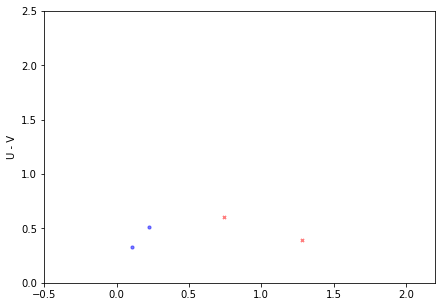

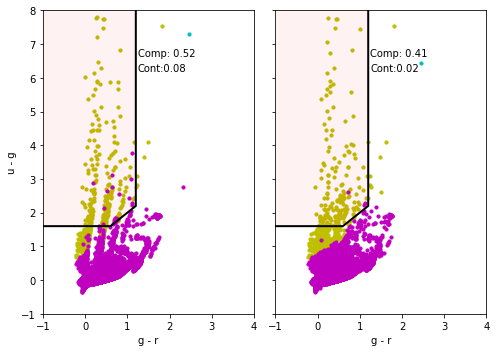

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(7, 5), sharex=True, sharey=True)



selection_statistics = {'Missed Selection': [], 'Misidentification': [], 'Correct Identification': [], 'Correct Non-UGR Identification': []}
# Realistically we are only interested in the correct identification and missed selection, but we will include all.
num_galaxies = len(zfourge_subset) # Because we consider all redshit ranges

# Completeness and contamination table
completeness_stats = {'Completeness': [] }


# # Get the u, g, and r magnitudes for the specific alpha value

for i in range(2):
    
    ax = axs[i]
    
    # Create the colours for the UGR diagram
    ug_specific_alpha_colours = zfourge_subset[f'UG_{galaxy_mode[i]}']
    gr_specific_alpha_colours = zfourge_subset[f'GR_{galaxy_mode[i]}']


    # Scatter plots with color-coded redshift ranges
    ax.scatter(gr_specific_alpha_colours[zfourge_subset['zpk_x'] > 3.5], 
                                ug_specific_alpha_colours[zfourge_subset['zpk_x'] > 3.5], 
                                c="c", s=10)

    ax.scatter(gr_specific_alpha_colours[(zfourge_subset['zpk_x'] > 2.6) & (zfourge_subset['zpk_x'] <= 3.5)], 
                                ug_specific_alpha_colours[(zfourge_subset['zpk_x'] > 2.6) & (zfourge_subset['zpk_x'] <= 3.5)], 
                                c="y", s=10)

    ax.scatter(gr_specific_alpha_colours[zfourge_subset['zpk_x'] < 2.6], 
                                ug_specific_alpha_colours[zfourge_subset['zpk_x'] < 2.6], 
                                c="m", s=10)
    
    # Additionally we can plot the UGR selection criteria on the UGR diagram
    U_rule = [[1.2,9], [1.2,2.2], [0.6,1.6], [-3,1.6], [-3,9]]

    # Add patch to correct plot
    ax.add_patch(plt.Polygon(U_rule, closed=True, fill=True, facecolor=(1,0,0,0.05), edgecolor=(0,0,0,1), linewidth=2, linestyle='solid')) # This looks like the correct U dropout

    
    # Set limits
    plt.xlim(-1, 4)
    plt.ylim(-1, 8)
    
    # Set labels
    ax.set_xlabel('g - r')
    # Only set the y label for the left plot
    if i == 0:
        ax.set_ylabel('u - g')
    
    
    
    # Do the completeness 
    path = mpath.Path(U_rule)
    
    # Create a DataFrame with just the u-g and g-r columns for easier selection
    ugr_data = pd.DataFrame({'gr': gr_specific_alpha_colours, 'ug': ug_specific_alpha_colours})
    
    # append the associated redshifts to the ugr data
    redshifts = zfourge_subset['zpk_x']
    
    
    
    # Perform the selection
    selected_seds = ugr_data[path.contains_points(ugr_data.values)]
    non_selected_seds = ugr_data[~path.contains_points(ugr_data.values)]
    
    # Using the id of the selected seds, we can find the associated redshift values
    redshifts_selected = redshifts[selected_seds.index]
    redshifts_non_selected = redshifts[non_selected_seds.index]
    
    # We can then append the redshifts to the selected seds
    selected_seds['redshift'] = redshifts_selected
    non_selected_seds['redshift'] = redshifts_non_selected
    
    # using the above data we can calculate the fractions
    correct_ugr_selection = selected_seds[(selected_seds['redshift'] >= 2.6) & (selected_seds['redshift'] <= 3.5)]
    correct_nonugr_selection = non_selected_seds[(non_selected_seds['redshift'] < 2.6) | (non_selected_seds['redshift'] > 3.5)]
    
    # Combine the above to be a correct identification
    #correct_identification = correct_ugr_selection.append(correct_nonugr_selection)
    
    # Misidentification - a selected sed that was not in the redshift range we were after - incorrect redshift range
    misidentification = selected_seds[(selected_seds['redshift'] < 2.6) | (selected_seds['redshift'] > 3.5)]
    
    # Missed Selection - a non-selected sed SED that was in the redshift range we were after, something we missed.
    missed_selection = non_selected_seds[(non_selected_seds['redshift'] >= 2.6) & (non_selected_seds['redshift'] <= 3.5)]
    
    
    # Print the numbers without the fractions
    print(f"Correct Identification: {len(correct_ugr_selection)}")
    print(f"Correct Non-UGR Identification: {len(correct_nonugr_selection)}")
    print(f"Misidentification: {len(misidentification)}")
    print(f"Missed Selection: {len(missed_selection)}")
    
    
    
    
    # # Calculate the fractions
    # selection_statistics['Correct Identification'].append(len(correct_ugr_selection) / num_galaxies)
    # selection_statistics['Correct Non-UGR Identification'].append(len(correct_nonugr_selection) / num_galaxies)
    # selection_statistics['Misidentification'].append(len(misidentification) / num_galaxies)
    # selection_statistics['Missed Selection'].append(len(missed_selection) / num_galaxies)
    
    # Instead of fractions, we can just append the numbers
    selection_statistics['Correct Identification'].append(len(correct_ugr_selection))
    selection_statistics['Correct Non-UGR Identification'].append(len(correct_nonugr_selection))
    selection_statistics['Misidentification'].append(len(misidentification))
    selection_statistics['Missed Selection'].append(len(missed_selection))
    
    # We can also quantify the completeness and contamination of the selection
    # Completeness = Correct Identification / (Correct Identification + Missed Selection)
    # Contamination = Misidentification / (Correct Identification + Misidentification)
    
    completeness = len(correct_ugr_selection) / (len(correct_ugr_selection) + len(missed_selection))
    contamination = len(misidentification) / (len(correct_ugr_selection) + len(misidentification))
    
    # Append the values
    completeness_stats['Completeness'].append(completeness)
    #completeness_stats['Contamination'].append(contamination)
    
    # add to plot
    ax.text(0.45, 0.85, f'Comp: {completeness:.2f}', transform=ax.transAxes, color='k')
    
    # add contamination below
    ax.text(0.45, 0.8, f'Cont:{contamination:.2f}', transform=ax.transAxes, color='k')
    
    
plt.tight_layout()    
    
# save
if save_figures:
    plt.savefig(f'outputs/ThesisPlots/UGR_agn_evolution_CIGALE_ZFOURGE_comparison.png')
        
        

plt.show()
